In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
import zipfile

In [4]:
train_path = "C:\\Users\\SPURGE\\Desktop\\dektop\\archive\\DATASET\\DATASET\\TRAIN"
test_path = "C:\\Users\\SPURGE\\Desktop\\dektop\\archive\\DATASET\\DATASET\\TEST"

In [5]:
!pip install tensorflow

In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [8]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [00:13<00:00, 751.33it/s]


In [9]:
data.shape

(22564, 2)

In [10]:
from collections import Counter
Counter(y_data)

Counter({'C:\\Users\\SPURGE\\Desktop\\dektop\\archive\\DATASET\\DATASET\\TRAIN\\O': 12565,
         'C:\\Users\\SPURGE\\Desktop\\dektop\\archive\\DATASET\\DATASET\\TRAIN\\R': 9999})

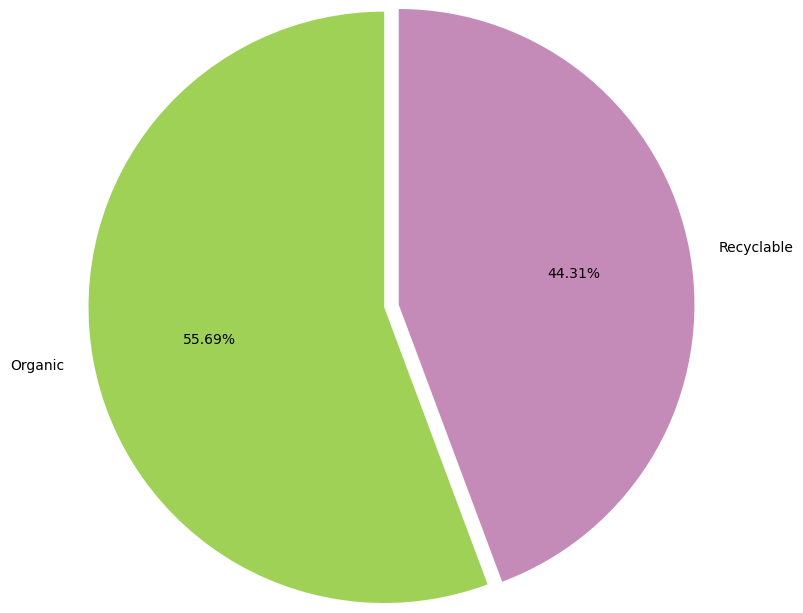

In [14]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

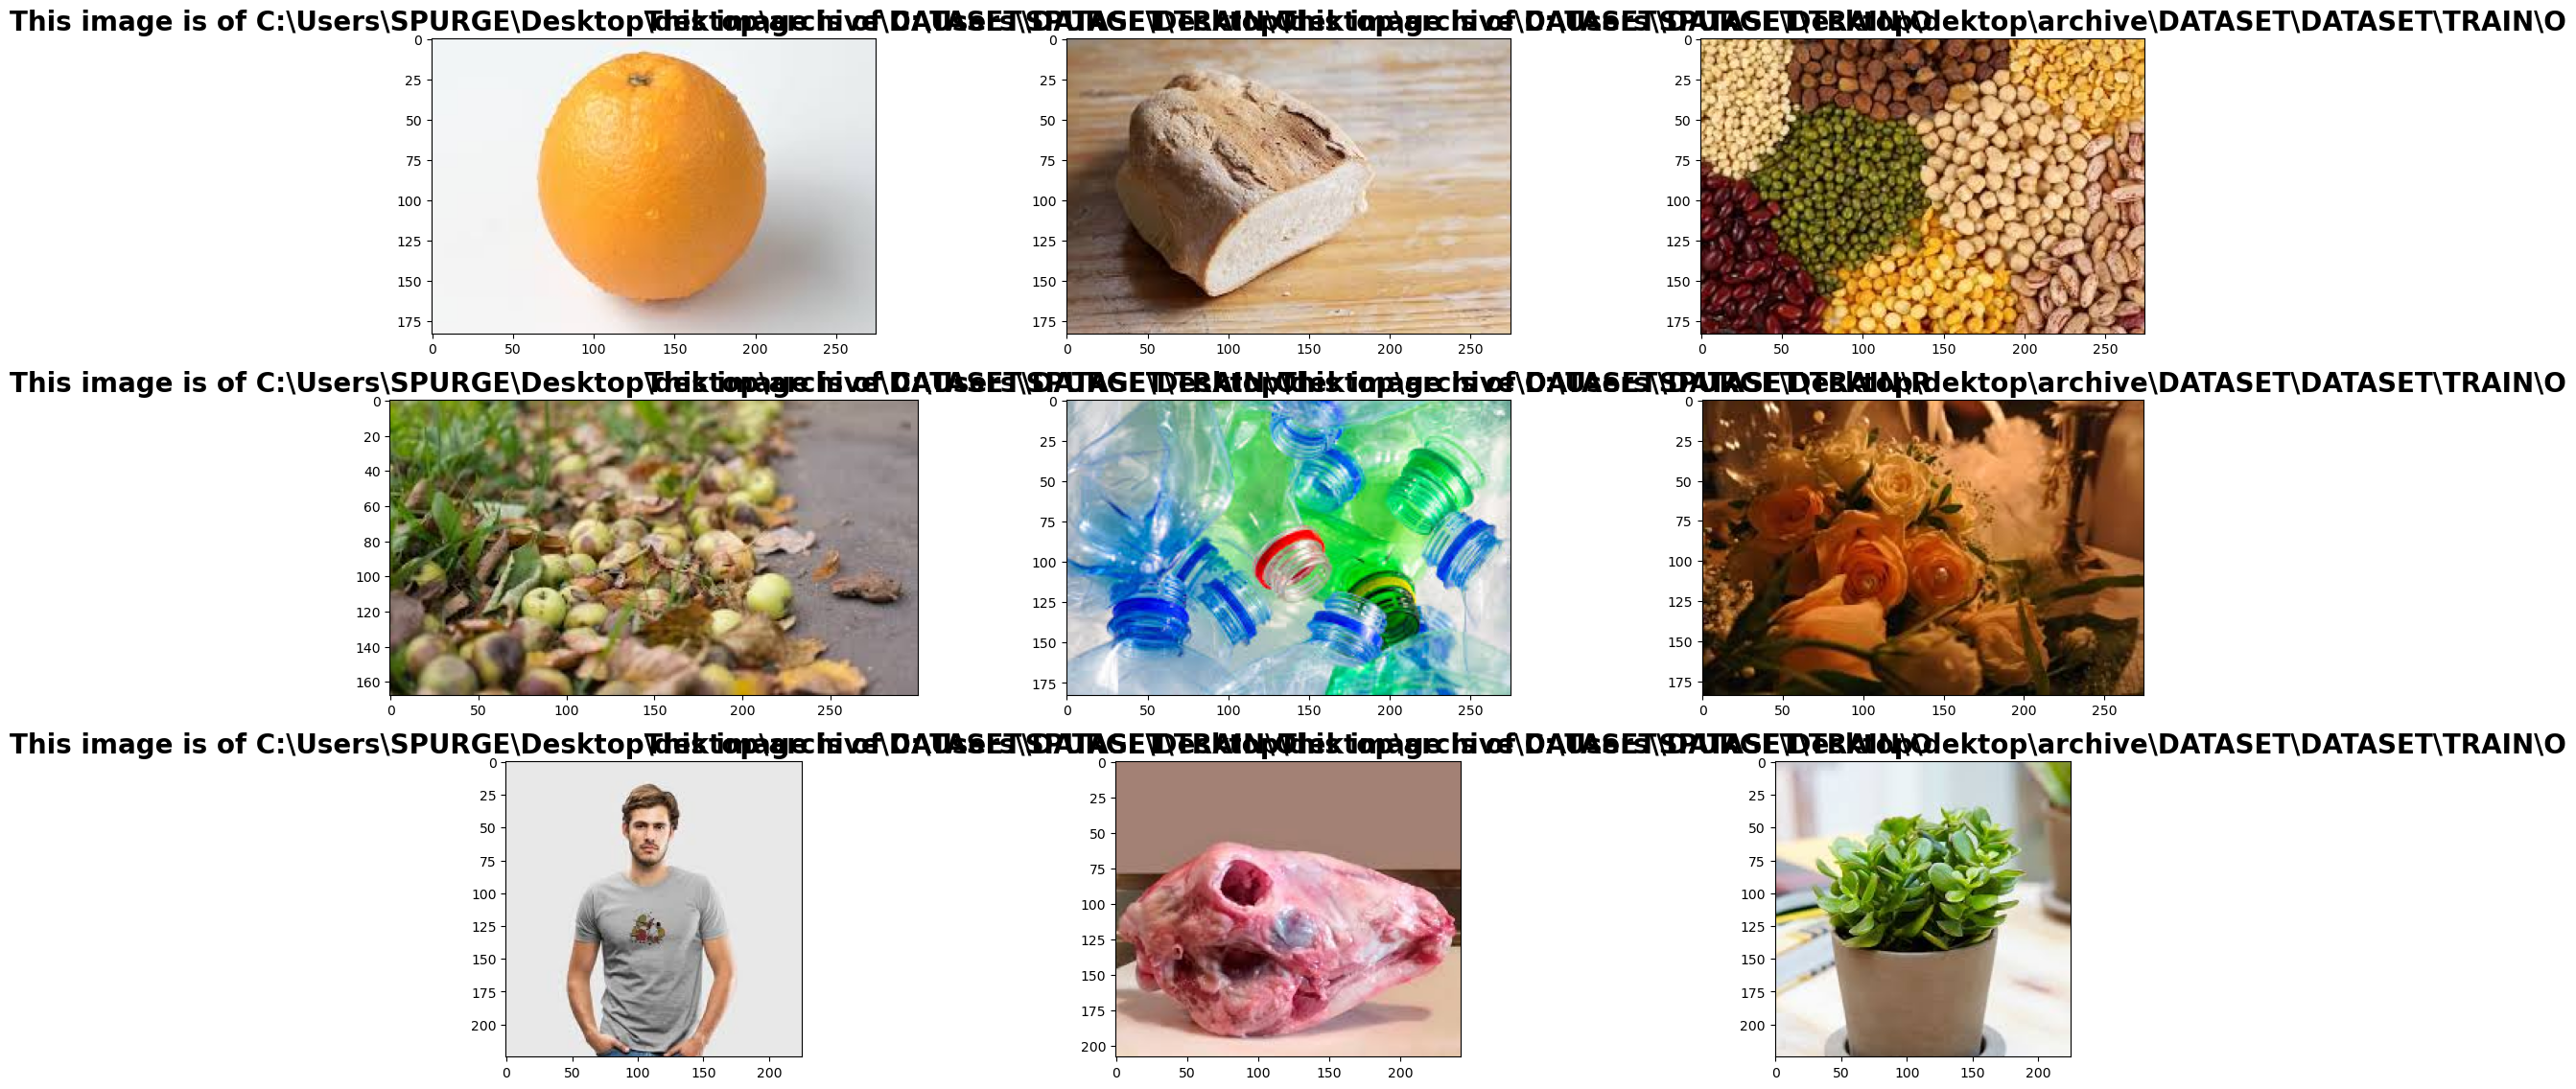

In [15]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [16]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [18]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [19]:
plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [20]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [21]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [22]:
"""train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")"""
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=16,  # Reduce from 32 or 64 to a smaller number
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=16,  # Match the reduced batch size
    class_mode='categorical'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [23]:
hist = model.fit(
    train_generator,
    epochs=1,
    validation_data=test_generator
)

1411/1411 ━━━━━━━━━━━━━━━━━━━━ 1334s 944ms/step - accuracy: 0.7654 - loss: 0.5619 - val_accuracy: 0.8770 - val_loss: 0.3564


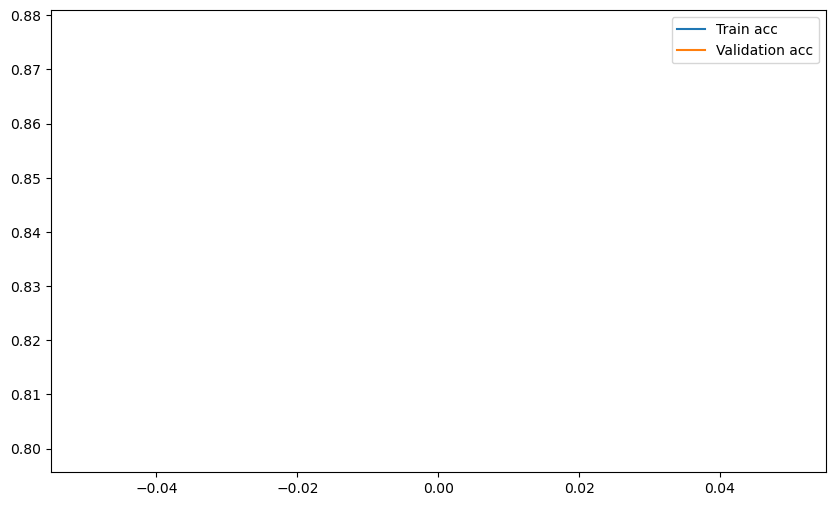

In [39]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")

plt.legend()
plt.show()

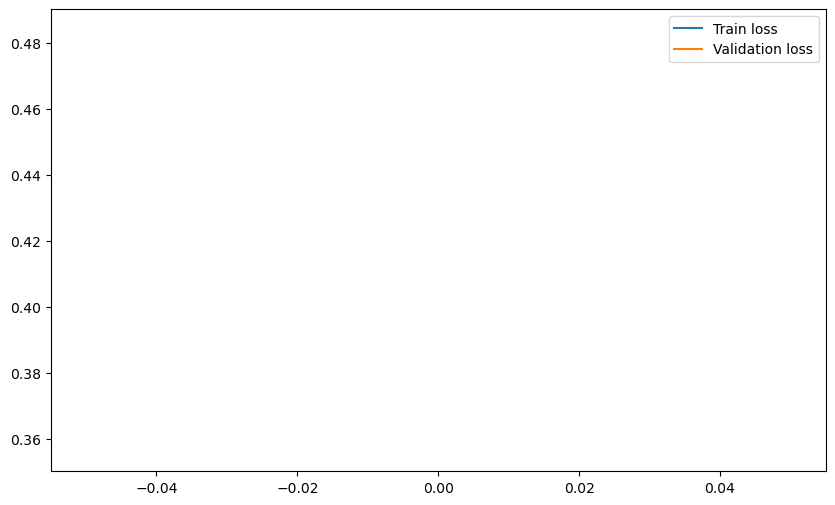

In [40]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [41]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
This image -> Organic


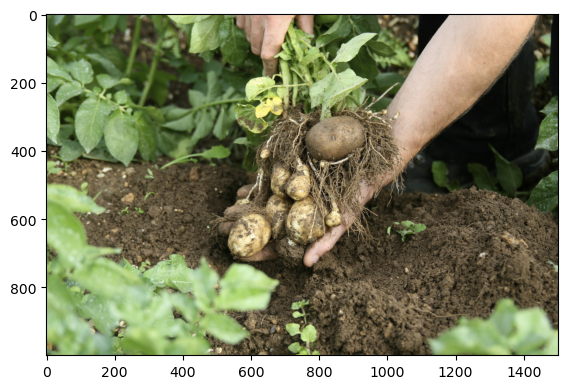

In [44]:
test_img = cv2.imread("C://Users//SPURGE//Desktop//dektop//archive//test//one.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
This image -> Recyclable


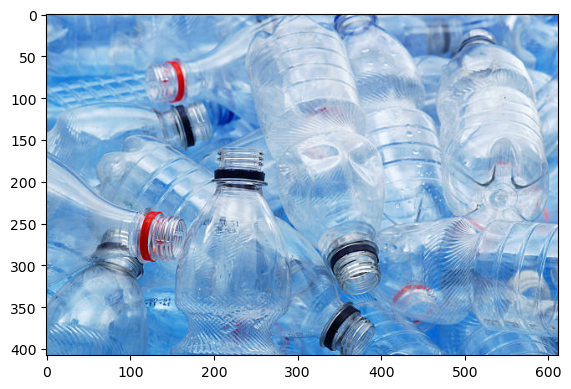

In [50]:
test_img = cv2.imread("C://Users//SPURGE//Desktop//dektop//archive//test//two2.jpg")
predict_func(test_img)